In [1]:
#Ex 03-Implementation of Simple Linear Regression Model Using Gradient descent
#Name.Sudharshna Lakshmi S
#Reg no.212221230110

In [2]:
#import files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("ex1.txt",header=None)

Text(0.5, 1.0, 'Profit Prediction')

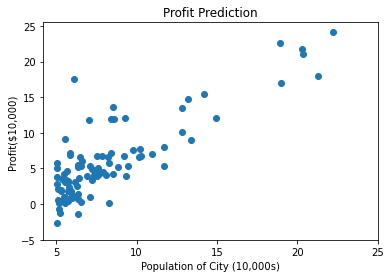

In [4]:
plt.scatter(df[0],df[1])
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit Prediction")

In [5]:
"""
Take in a np array X,y,theta and generate the cost function of using theta as parameter in a linear regression model
"""
def computeCost(X,y,theta):
    m=len(y) #length of the training data
    h=X.dot(theta) #hypothesis
    square_err=(h-y)**2
    
    return 1/(2*m)*np.sum(square_err) #returning J

In [6]:
df_n=df.values
m=df_n[:,0].size
X=np.append(np.ones((m,1)),df_n[:,0].reshape(m,1),axis=1)
y=df_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computeCost(X,y,theta) #call the function

32.072733877455676

In [7]:
"""
Take in np array X,y and theta and update theta by taking num_iters gradient steps with learning rate of alpha 
return theta and the list of the cost of theta during each iteration
"""
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    
    for i in range(num_iters):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent = alpha*(1/m )*error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    return theta,J_history

In [8]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x)="+str(round(theta[0,0],2))+"+"+str(round(theta[1,0],2))+"x1")

h(x)=-3.63+1.17x1


Text(0.5, 1.0, 'Cost function using Gradient Descent')

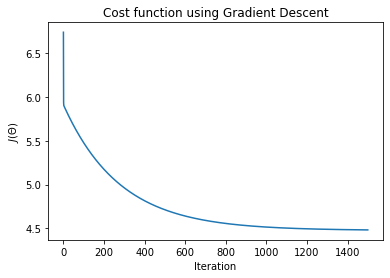

In [9]:
#Testing the implementation
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

Text(0.5, 1.0, 'Profit Prediction')

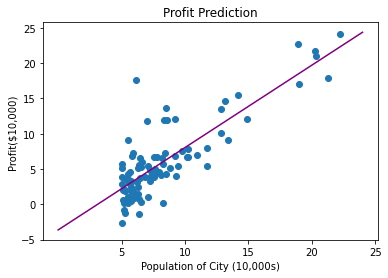

In [10]:
plt.scatter(df[0],df[1])
x_value=[x for x in range(25)]
y_value=[y*theta[1]+theta[0]for y in x_value]
plt.plot(x_value,y_value,color="purple")
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit($10,000)")
plt.title("Profit Prediction")

In [11]:
"""
Takes in numpy array of x and theta and return the predicted value of y based on theta
"""
def predict(x,theta):
    predictions = np.dot(theta.transpose(),x)
    return predictions[0]

In [12]:
predict1=predict(np.array([1,3.5]),theta)*10000
print("For population = 35,000 , we predict a profit of $"+str(round(predict1,0)))

For population = 35,000 , we predict a profit of $4520.0


In [13]:
predict2=predict(np.array([1,7]),theta)*10000
print("For population = 70,000 , we predict a profit of $"+str(round(predict2,0)))

For population = 70,000 , we predict a profit of $45342.0
